# COM2011 Machine Learning and Data Science Coursework


This jupyter notebook is intended to be executed in sequence as some variable names are reused to improve readability so it is recommended to select the run all option. Please be advised there exists Search Cross Validation code blocks which take alot of time and cpu load to run. On average the full script takes 5 minutes to run.

There are plots in this analysis that require matplot lib version 3.1.0. The confusion matrices dont display properly on later versions.

In [1]:
pip install matplotlib==3.1.0 --user

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from numpy import set_printoptions
import statistics

Extract the data from the excel file and contain it within a dataframe. As we can see from the output below this data contains 4833 observations and 189 variables. Of these 189 variables there are 188 features and 1 target.

In [3]:
col_names = ['area id', 'weight', 'weight 2.5 perc', 'weight 25 perc', 'weight 50 perc', 'weight 75 perc', 'weight 97.5 perc', 'weight standard deviation', 'weight 95 confidence', 'volume', 'volume 2.5 perc', 'volume 25 perc', 'volume 50 perc', 'volume 75 perc', 'volume 97.5 perc', 'volume standard deviation', 'volume 95 confidence', 'fat', 'fat 2.5 perc', 'fat 25 perc', 'fat 50 perc', 'fat 75 perc', 'fat 97.5 perc', 'fat standard deviation', 'fat 95 confidence', 'saturate', 'saturate 2.5 perc', 'saturate 25 perc', 'saturate 50 perc', 'saturate 75 perc', 'saturate 97.5 perc', 'saturate standard deviation', 'saturate 95 confidence', 'salt', 'salt 2.5 perc', 'salt 25 perc', 'salt 50 perc', 'salt 75 perc', 'salt 97.5 perc', 'salt standard deviation', 'salt 95 confidence', 'sugar', 'sugar 2.5 perc', 'sugar 25 perc', 'sugar 50 perc', 'sugar 75 perc', 'sugar 97.5 perc', 'sugar standard deviation', 'sugar 95 confidence', 'protein', 'protein 2.5 perc', 'protein 25 perc', 'protein 50 perc', 'protein 75 perc', 'protein 97.5 perc', 'protein standard deviation', 'protein 95 confidence', 'carb', 'carb 2.5 perc', 'carb 25 perc', 'carb 50 perc', 'carb 75 perc', 'carb 97.5 perc', 'carb standard deviation', 'carb 95 confidence', 'fibre', 'fibre 2.5 perc', 'fibre 25 perc', 'fibre 50 perc', 'fibre 75 perc', 'fibre 97.5 perc', 'fibre standard deviation', 'fibre 95 confidence', 'alcohol', 'alcohol 2.5 perc', 'alcohol 25 perc', 'alcohol 50 perc', 'alcohol 75 perc', 'alcohol 97.5 perc', 'alcoholstandard deviation', 'alcohol 95 confidence', 'energy fat', 'energy fat 2.5 perc', 'energy fat 25 perc', 'energy fat 50 perc', 'energy fat 75 perc', 'energy fat 97.5 perc', 'energy fat standard deviation', 'energy fat 95 confidence', 'energy saturate', 'energy saturate 2.5 perc', 'energy saturate 25 perc', 'energy saturate 50 perc', 'energy saturate 75 perc', 'energy saturate 97.5 perc', 'energy saturate standard deviation', 'energy saturate 95 confidence', 'energy sugar', 'energy sugar 2.5 perc', 'energy sugar 25 perc', 'energy sugar 50 perc', 'energy sugar 75 perc', 'energy sugar 97.5 perc', 'energy sugar standard deviation', 'energy sugar 95 confidence', 'energy protein', 'energy protein 2.5 perc', 'energy protein 25 perc', 'energy protein 50 perc', 'energy protein 75 perc', 'energy protein 97.5 perc', 'energy protein standard deviation', 'energy protein 95 confidence', 'energy carb', 'energy carb 2.5 perc', 'energy carb 25 perc', 'energy carb 50 perc', 'energy carb 75 perc', 'energy carb 97.5 perc', 'energy carb standard deviation', 'energy carb 95 confidence', 'energy fibre', 'energy fibre 2.5 perc', 'energy fibre 25 perc', 'energy fibre 50 perc', 'energy fibre 75 perc', 'energy fibre 97.5 perc', 'energy fibre standard deviation', 'energy fibre 95 confidence', 'energy alcohol', 'energy alcohol 2.5 perc', 'energy alcohol 25 perc', 'energy alcohol 50 perc', 'energy alcohol 75 perc', 'energy alcohol 97.5 perc', 'energy alcohol standard deviation', 'energy alcohol 95 confidence', 'energy total', 'energy total 2.5 perc', 'energy total 25 perc', 'energy total 50 perc', 'energy total 75 perc', 'energy total 97.5 perc', 'energy total standard deviation', 'energy total 95 confidence', 'fraction energy fat', 'fraction energy saturate', 'fraction energy sugar', 'fraction energy protein', 'fraction energy carb', 'fraction energy fibre', 'fraction energy alcohol', 'energy density', 'entropy nutrients weight', 'entropy nutrients weight norm', 'entropy nutrients calories', 'entropy nutrients calories norm', 'fraction beer', 'fraction dairy', 'fraction eggs','fraction fats oils','fraction fish','fraction fruit veg','fraction grains','fraction red meat','fraction poultry','fraction readymade','fraction sauces','fraction soft drinks','fraction spirits','fraction sweets','fraction tea coffee','fraction water','fraction wine', 'fraction dairy weight', 'fraction eggs weight','fraction fats oils weight','fraction fish weight','fraction fruit veg weight','fraction grains weight','fraction red meat weight','fraction poultry weight','fraction readymade weight','fraction sauces weight', 'fraction sweets weight', 'entropy items', 'entropy items norm', 'entropy items weight', 'entropy items weight norm', 'imd label']
shopping_df = pd.read_csv(r"C:\Users\kiera\OneDrive\Desktop\BSC Computer Science\Machine Learning and Data Science\Coursework\data.csv",header=0, names=col_names)
shopping_df = shopping_df.drop('area id', 1) #drop the area id column as it is not need.
shopping_df = shopping_df.dropna() #drop any rows that contain missing data.
shopping_df

,weight,weight 2.5 perc,weight 25 perc,weight 50 perc,weight 75 perc,weight 97.5 perc,weight standard deviation,weight 95 confidence,volume,volume 2.5 perc,...,fraction red meat weight,fraction poultry weight,fraction readymade weight,fraction sauces weight,fraction sweets weight,entropy items,entropy items norm,entropy items weight,entropy items weight norm,imd label
0,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,15.0,...,0.053695,0.029873,0.073981,0.010287,0.088967,3.083883,0.754474,2.646361,0.764970,100
1,313.517874,40.0,150.0,250.0,400.0,900.0,256.227843,2.833812,88.262314,15.0,...,0.046385,0.039828,0.087889,0.012953,0.078903,3.109808,0.760816,2.635745,0.761901,100
2,315.084751,35.0,150.0,250.0,400.0,1000.0,292.462262,2.763918,102.240558,15.0,...,0.061209,0.033860,0.096251,0.010033,0.104956,3.246515,0.794262,2.731671,0.789630,60
3,356.033437,38.0,150.0,280.0,450.0,1000.0,436.559315,2.554110,113.968805,11.0,...,0.052512,0.045029,0.066584,0.015151,0.098030,3.195842,0.781864,2.748755,0.794568,50
4,451.262063,36.0,180.0,325.0,500.0,1500.0,666.655869,7.744708,133.322097,10.0,...,0.050193,0.047305,0.036775,0.011197,0.120490,3.190031,0.780443,2.712692,0.784144,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,387.401492,37.5,170.0,300.0,500.0,1000.0,402.790826,2.671220,100.481483,11.0,...,0.069789,0.056584,0.056673,0.018928,0.092860,3.324398,0.813316,2.850659,0.824025,70
4829,420.188421,33.0,170.0,340.0,500.0,1500.0,495.895799,4.655028,106.949648,10.1,...,0.048815,0.044935,0.040084,0.011232,0.115006,3.282170,0.802985,2.737303,0.791258,40
4830,402.531751,35.0,170.0,300.0,500.0,1200.0,499.572412,3.129316,113.476785,11.0,...,0.068354,0.056996,0.061242,0.015109,0.103338,3.322410,0.812829,2.868916,0.829303,30
4831,435.686457,40.0,182.0,350.0,500.0,1500.0,536.871624,6.140228,120.670999,10.1,...,0.058930,0.058755,0.046397,0.011316,0.099976,3.248057,0.794639,2.808205,0.811753,50


QUESTION 1 - TRAIN A DECISION TREE CLASSIFIER.
The aim of this question is to use a decision tree classifier to predict the deprevation percentiles in IMD label using the rest of the data as predictors. As such, we will be performing feature selection and seeing how the various parameters of the decision tree classifier effect the accuracy of its predictions. 

In [4]:
x = shopping_df[col_names[1:-1]] # Features
y = shopping_df[col_names[-1]] # Target variable

Below we split our raw data using all features into training and testing data with a split of 70% training and 30% testing. The initial accuracy and precision of the model is calculated giving us an accuracy and precision of 18.3%. The accuracy and precision of this model are very low indicating a bad model. 

In [5]:
tree = DecisionTreeClassifier(random_state= 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # 70% training and 30% test
tree = tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred) *100)
print(metrics.precision_score(y_test, y_pred, average='macro', zero_division=0) *100)

18.275862068965516
18.321815101439253


Below we create our first decision tree classifier object with the intention of using it to rank feature importance. The feature_importances_ uses Gini Importance to rank our variables by the average gain in purity acquired by using that variable to split nodes. Variables that give importance of zero are removed from the data frame as they do not provide any benefit in our model. This leaves us with a data frame of features in descending order of importance. Looking at this importance data frame from a real-world perspective, we can make some observations. For example, the most important (heavily correlating to target variable) feature is said to be a fraction of water bought. This makes sense from a positive correlational view as perhaps people in the top 10% of deprived areas may buy more bottled water as their water at home is of lower quality than those of the bottom 10% of deprived areas. On the other hand, perhaps people in the bottom 10% of deprived areas can afford the luxury of bottled water and opt for that over the water at home. 

In [6]:
tree.feature_importances_
tree_importance = pd.DataFrame({'Feature':x.columns,'Importance':tree.feature_importances_})
tree_importance = tree_importance[tree_importance.Importance != 0]
tree_importance = tree_importance.sort_values('Importance', ascending = False)
tree_importance

,Feature,Importance
171,fraction water,0.043907
64,fibre,0.034090
167,fraction soft drinks,0.022532
156,fraction beer,0.018435
6,weight standard deviation,0.018385
...,...,...
133,energy alcohol 97.5 perc,0.001265
18,fat 25 perc,0.000328
119,energy carb 95 confidence,0.000328
107,energy protein 50 perc,0.000328


Below we define the function performance, which will be the primary method for determining the performance of the model. The performance of the model will be determined by its predictive capabilities, or more specifically, the percentage of accuracy and precision between the test targets and the predicted targets. Performance takes the training and testing data along with various parameters used to configure the model, creates the model using these parameters and calculates the performance of the model.

In [7]:
def tree_performance(x_train, x_test, y_train, y_test, criterion = "gini", splitter = "best", max_depth = None):
    tree = DecisionTreeClassifier(criterion = criterion, 
                                  splitter = splitter, 
                                  max_depth = max_depth, 
                                  random_state = 0)
    tree = tree.fit(x_train,y_train)
    y_pred = tree.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) *100
    precision = metrics.precision_score(y_test, y_pred, average='macro',zero_division=0) *100
    return accuracy, precision

Below we define the function feature_performance, which is used to determine how the number of features used in the model effects its performance. The function takes a list of integers representing the number of features and extracts that number of features from the importance data frame. A 70 30 split train-test dataset is created using these features and is fed into the performance function to determine the performance that the dataset has achieved. The function then returns lists of the accuracies and precisions.

In [8]:
def feature_performance(number_of_features):
    feature_accuracies = []
    feature_precisions = []
    for amount in number_of_features:
        x = shopping_df[tree_importance["Feature"].head(amount)] # Features
        y = shopping_df[col_names[-1]] # Target variable
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # 70% training and 30% test
        accuracy, precision = tree_performance(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test)
        feature_accuracies.append(accuracy)
        feature_precisions.append(precision)
    return feature_accuracies, feature_precisions

Below we execute the feature performance function and display the results in a dataframe.

In [9]:
number_of_features = [2,5,10, 30, 70, 100, 130, tree_importance.shape[0]]
feature_accuracies, feature_precisions = feature_performance(number_of_features)
feature_performances = pd.DataFrame(list(zip(number_of_features, feature_accuracies, feature_precisions)), 
                                    columns =['Number of Features', 'Average Predictive Accuracy in %', 
                                              'Average Predictive Precision in %'])
feature_performances

,Number of Features,Average Predictive Accuracy in %,Average Predictive Precision in %
0,2,16.000000,15.838138
1,5,15.793103,15.696725
2,10,17.241379,17.350628
3,30,19.034483,18.731526
4,70,18.206897,18.201016
5,100,18.413793,18.516811
6,130,20.068966,20.095773
7,161,18.068966,18.068261


Here we show how the number of features used in the model affects the accuracy and precision via a bar graph. Finding the optimal number of features to use for a model can be tricky as it requires finding the sweet spot between underfitting and overfitting the model. Surprisingly from looking at the plot, we can see that model accuracy and precision are at their max with 130 features used which is much higher than you would usually estimate. With this many features used, you would expect the model to overfit the data meaning the difference between training accuracy and the testing accuracy is high, causing our model to not generalise well from training data to testing data reducing the accuracy of model predictions. In this example, however, using 130 features does not seem to cause an overfit and is the optimal number of features to use as it produces the highest performance. The reduction in performance from 130 to 161 features does cause a significant reduction in performance (approx. 2% in accuracy and precision) and, as such, implies the model starts to over-fit as it uses more than 130 features.

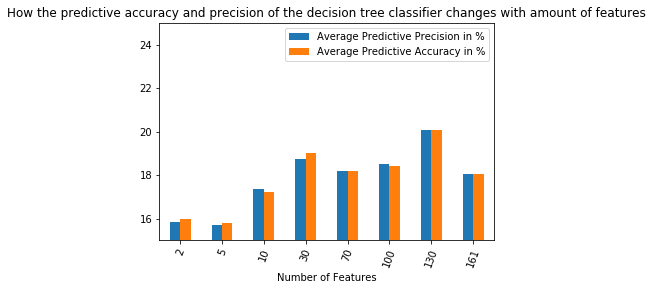

In [10]:
feature_performances.plot.bar(x="Number of Features", 
                              y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                              rot=70, 
                              title="How the predictive accuracy and precision of the decision tree classifier changes with amount of features", 
                              ylim = (15,25))

We implement the results of our previous analysis by creating a new training and testing set using the top 130 features from our importance dataframe.

In [11]:
x2 = shopping_df[tree_importance["Feature"].head(130)]
y2 = shopping_df[col_names[-1]]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3, random_state=0) # 70% training and 30% test

Below we create a decision tree classifier object and print its max depth to get an approximate idea of the maximum depth our model will reach when using the updated data set. This is only an approximate value as the randomness of decision trees can cause the max depth to differ slightly; however, it gives a good idea of a maximum depth to test and lead to further, more precise exploration.

In [12]:
tree = DecisionTreeClassifier(random_state= 0)
tree = tree.fit(x_train2, y_train2)
tree.tree_.max_depth

26

depth_performance is a function that outputs the accuracy and precision of models using various values of maximum depth. The depths parameter is a list of integers representing the depth of the decision tree. This function uses the previously mentioned performance function for accuracy and precision calculations. The depth of a decision tree refers to how many nodes splits it can make before coming up with a prediction. Similar to the number of features, the optimal depth of a decision tree can be tricky to determine as it too will affect the fit of the model to the data. A maximum depth that is too low will make the model lose flexibility, and a maximum depth too high will cause the model to overfit the data. As such, below, we analyse the performance of the model when using various values for the maximum depth of the tree. 

In [13]:
def depth_performance(depths):
    depth_accuracies = []
    depth_precisions = []
    for depth in depths:
        accuracy, precision = tree_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, 
                                                  max_depth = depth)
        depth_accuracies.append(accuracy)
        depth_precisions.append(precision)
    return depth_accuracies, depth_precisions

Below we execute the depth performance function and display the results in a dataframe.

In [14]:
depths = [None, 1, 2, 5, 10, 20, tree.tree_.max_depth]
depth_accuracies, depth_precisions = depth_performance(depths)
depth_performances = pd.DataFrame(list(zip(depths, depth_accuracies, depth_precisions)), 
                                  columns =['Depth of Tree', 
                                            'Average Predictive Accuracy in %', 
                                            'Average Predictive Precision in %'])
depth_performances

,Depth of Tree,Average Predictive Accuracy in %,Average Predictive Precision in %
0,NaN,20.068966,20.095773
1,1.0,17.241379,3.494878
2,2.0,19.724138,8.351182
3,5.0,20.689655,24.091465
4,10.0,19.517241,19.668141
5,20.0,19.586207,19.680869
6,26.0,20.068966,20.095773


The plot below shows how the depth of the decision tree classifier affects the accuracy and precision of its predictions as a bar graph. The first insight we gain is that a maximum depth of 5 produces the highest model performance, with prediction accuracy at 20.7% and precision at 24.1%. What this means is the path from the root to the leaf node is 5, and the tree uses 5 splits to determine its prediction. As mentioned before, in reference to feature amounts, it is surprising that the highest max depth has the second-highest accuracy and precision as you would expect this to cause the model to overfit, but evidently, this is not the case. A depth of 5 seems to give an unusually high precision compared to the other depths telling us a depth of 5 produces a higher ratio of correctly predicted positive observations to the total predicted positive observations. Its accuracy implies it produces the highest ratio of correctly predicted observations to total observations. The low precision of depths 1 and 2 implies that either the ratio of correctly predicted positive observations to the total predicted positive observations are low for these depths, or the precision score function encountered a zero division error. This is not an issue, however, as the low accuracy score of depths 1 and 2 exclude them from usage in the model.

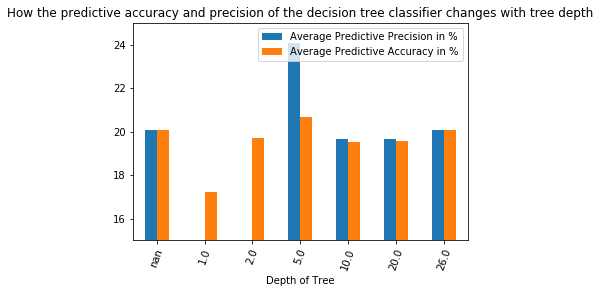

In [15]:
depth_performances.plot.bar(x="Depth of Tree", 
                            y={"Average Predictive Accuracy in %", 
                               "Average Predictive Precision in %"}, 
                            rot=70, 
                            title="How the predictive accuracy and precision of the decision tree classifier changes with tree depth", 
                            ylim = (15,25))

Next we will analysis the criterion parameter of the decision tree classifier and how it effects performance. The criterion parameter selects which function to use to measure the quality of a split. Gini uses Gini Impurity function to split nodes whereas entropy uses information gain to split nodes. We test these parameters by using a model which incorporates all of the optimal parameters that have been found up till now (amount of features, max depth). This information is displayed below in a dataframe.  

In [16]:
accuracy_gini, precision_gini = tree_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, criterion = "gini", max_depth = 5)
accuracy_entropy, precision_entropy = tree_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, criterion = "entropy", max_depth = 5)
criterion_performance = pd.DataFrame({'Criterion Method' : ['Gini', 'Entropy'], 
                                      'Average Predictive Accuracy in %': [accuracy_gini, accuracy_entropy], 
                                      'Average Predictive Precision in %': [precision_gini, precision_entropy]})
criterion_performance

,Criterion Method,Average Predictive Accuracy in %,Average Predictive Precision in %
0,Gini,20.689655,24.091465
1,Entropy,19.448276,18.754863


The displayed plot shows our split methods and how they affect the performance of the model. From the plot, we can see that the Gini Impurity method allows for the highest model performance with an accuracy of 20.7% and a precision of 24.1%. The accuracy of this model has not increased since we analysed maximum depth as the decision tree classifier used the Gini Impurity method by default, meaning it was used for the previous analysis to split the nodes. We can confidently say that the Gini Impurity is the optimal method having an increased accuracy of approximately 1.3% and increased precision of approximately 0.7%. The Gini impurity function splits nodes by calculating a value that represents the likelihood of data being misclassified (increasing impurity) if it were given a random class. Therefore data can be classified by using the lowest probability of it being misclassified.

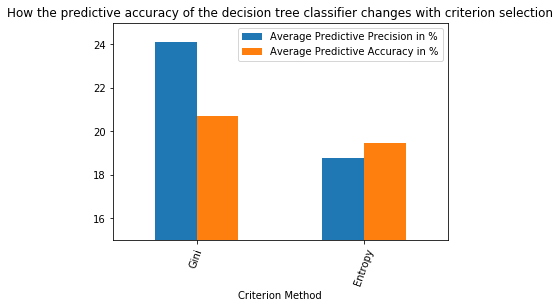

In [17]:
criterion_performance.plot.bar(x="Criterion Method", 
                               y={"Average Predictive Accuracy in %", 
                                  "Average Predictive Precision in %"}, 
                               rot=70, 
                               title="How the predictive accuracy of the decision tree classifier changes with criterion selection", 
                               ylim = (15,25))

Next we will analysis the splitter parameter of the decision tree classifier and how it effects performance. The splitter parameter determines which feature is used to split nodes. The "best" splitter uses the feature with the highest importance to split nodes whereas "random" uses a random feature to split data. We test these parameters by using a model which incorporates all of the optimal parameters that have been found up till now (amount of features, max depth, criterion). This information is displayed below in a dataframe.

In [18]:
accuracy_best, precision_best = tree_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, criterion = "gini", splitter = 'best', max_depth = 5)
accuracy_random, precision_random = tree_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, criterion = "gini", splitter = 'random', max_depth = 5)
splitter_performance = pd.DataFrame({'Splitter Method' : ['Best', 'Random'], 
                                     'Average Predictive Accuracy in %': [accuracy_best, accuracy_random], 
                                     'Average Predictive Precision in %': [precision_best, precision_random]})
splitter_performance

,Splitter Method,Average Predictive Accuracy in %,Average Predictive Precision in %
0,Best,20.689655,24.091465
1,Random,18.758621,16.729357


Below we can see the bar graph showing the splitter method and its respective accuracy and precision score. Very confidently, we can say (unsurprisingly) that the best method produced the best performance of the model with an accuracy of 27.7% and a precision of 24.1%. Once again, the best splitter is the default for the decision tree classifier, and this is why it has not affected the model's performance. The best method has an increased accuracy of approximately 2.1% and an increased precision of 7.4% over the random splitter. After the splitter method is used to split a node, the criterion method calculates, in this situation, the Gini impurity of that split and determines the quality of the split.

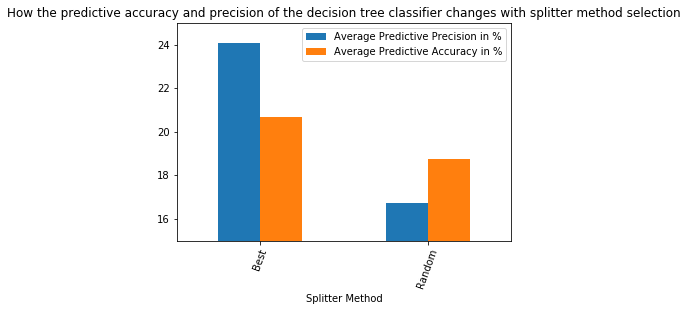

In [19]:
splitter_performance.plot.bar(x="Splitter Method", 
                              y={"Average Predictive Accuracy in %", 
                                 "Average Predictive Precision in %"}, 
                              rot=70, 
                              title="How the predictive accuracy and precision of the decision tree classifier changes with splitter method selection", 
                              ylim = (15,25))

Below, I have performed Cross-Validation to test that the model's optimal features are being used to ensure maximum accuracy and precision. The HalvingRandomSearchCV function applies randomized parameter optimization. Random CV allows us to get an idea of the approximate intervals where a parameter is optimized. Then by using these approximations of Grid CV, we save lots of computational time as we are checking a smaller amount of possible parameter values. The halving aspect of the function uses successive halving as it searches, further decreasing computational time. The cv parameter refers to the number of k-folds used in the search. The result of this search shows the optimum parameter values found by this particular search.

In [20]:
param_distributions = {'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 1, 2, 4, 8, 16, 32],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
}
cv_random = HalvingRandomSearchCV(tree, param_distributions, cv = 3, verbose=2, random_state=0, n_jobs = -1)
cv_random.fit(x_train2, y_train2)
cv_random.best_params_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 60
max_resources_: 3383
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 56
n_resources: 60
Fitting 3 folds for each of 56 candidates, totalling 168 fits
----------
iter: 1
n_candidates: 19
n_resources: 180
Fitting 3 folds for each of 19 candidates, totalling 57 fits
----------
iter: 2
n_candidates: 7
n_resources: 540
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 3
n_candidates: 3
n_resources: 1620
Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'splitter': 'random',
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'gini'}

By applying these optimised parameters, we can see that the accuracy of the model has increased by 1.8%, but the precision has fallen by 4.4%. This decrease in precision could be due to zero division error, or the implementation of the new parameter values has caused a decrease in true positives or an increase in false positives.

In [21]:
best_random = DecisionTreeClassifier(criterion = "gini", 
                                     splitter = "random", 
                                     max_depth = 4, 
                                     min_samples_split = 5, 
                                     min_samples_leaf = 2, 
                                     random_state = 0)
best_random = best_random.fit(x_train2,y_train2)
y_pred = best_random.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test2, y_pred, average='macro', zero_division=0) * 100)

Accuracy: 20.137931034482758
Precision: 13.943219924150712


We now re-search for parameter optimisation using tighter intervals aquired from the random search.

In [22]:
param_distributions = {'criterion': ['gini'],
            'splitter': ['random'],
            'max_depth': [4, 8, 32],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [2, 3, 4]
}
cv_grid = HalvingGridSearchCV(tree, param_distributions, n_jobs=-1, cv=3, verbose=2, random_state=0)
cv_grid.fit(x_train2, y_train2)
cv_grid.best_params_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 125
max_resources_: 3383
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 125
Fitting 3 folds for each of 27 candidates, totalling 81 fits
----------
iter: 1
n_candidates: 9
n_resources: 375
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 1125
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 3
n_candidates: 1
n_resources: 3375
Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'random'}

By applying the new optimised parameters we have managed to increase the accuracy of the model by 0.2% and the precision by 5.5%. There is likely better optimised parameters that can be found through further search however the accuracy will only likely increase by negligible amounts. These parameters will be used for the final decision tree classifier.

In [23]:
best_grid = DecisionTreeClassifier(criterion = "gini", 
                                   splitter = "random", 
                                   max_depth = 4, 
                                   min_samples_split = 5, 
                                   min_samples_leaf = 3, 
                                   random_state = 1)
best_grid = best_grid.fit(x_train2,y_train2)
y_pred = best_grid.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test2, y_pred, average='macro', zero_division=0) * 100)

Accuracy: 20.344827586206897
Precision: 19.384105643841302


At this point in the analysis my intention was to plot my original default model alongside my optimised model on a ROC curve graph however as this model deals with non-binary classification this would be counter-productive.

The plot below shows a visualization of the optimised decision tree classifier. From this we can see the maximum depth is 4 as nodes only split 4 times bfore reaching their leaf node. By zooming in we can also see the Gini impurity value of each node and how many samples are in each node before being split. The Gini impurity value of each node is significantly high with the majority being above 0.85 showing a high probability of data being misclassified leading to our low accuracy score. 

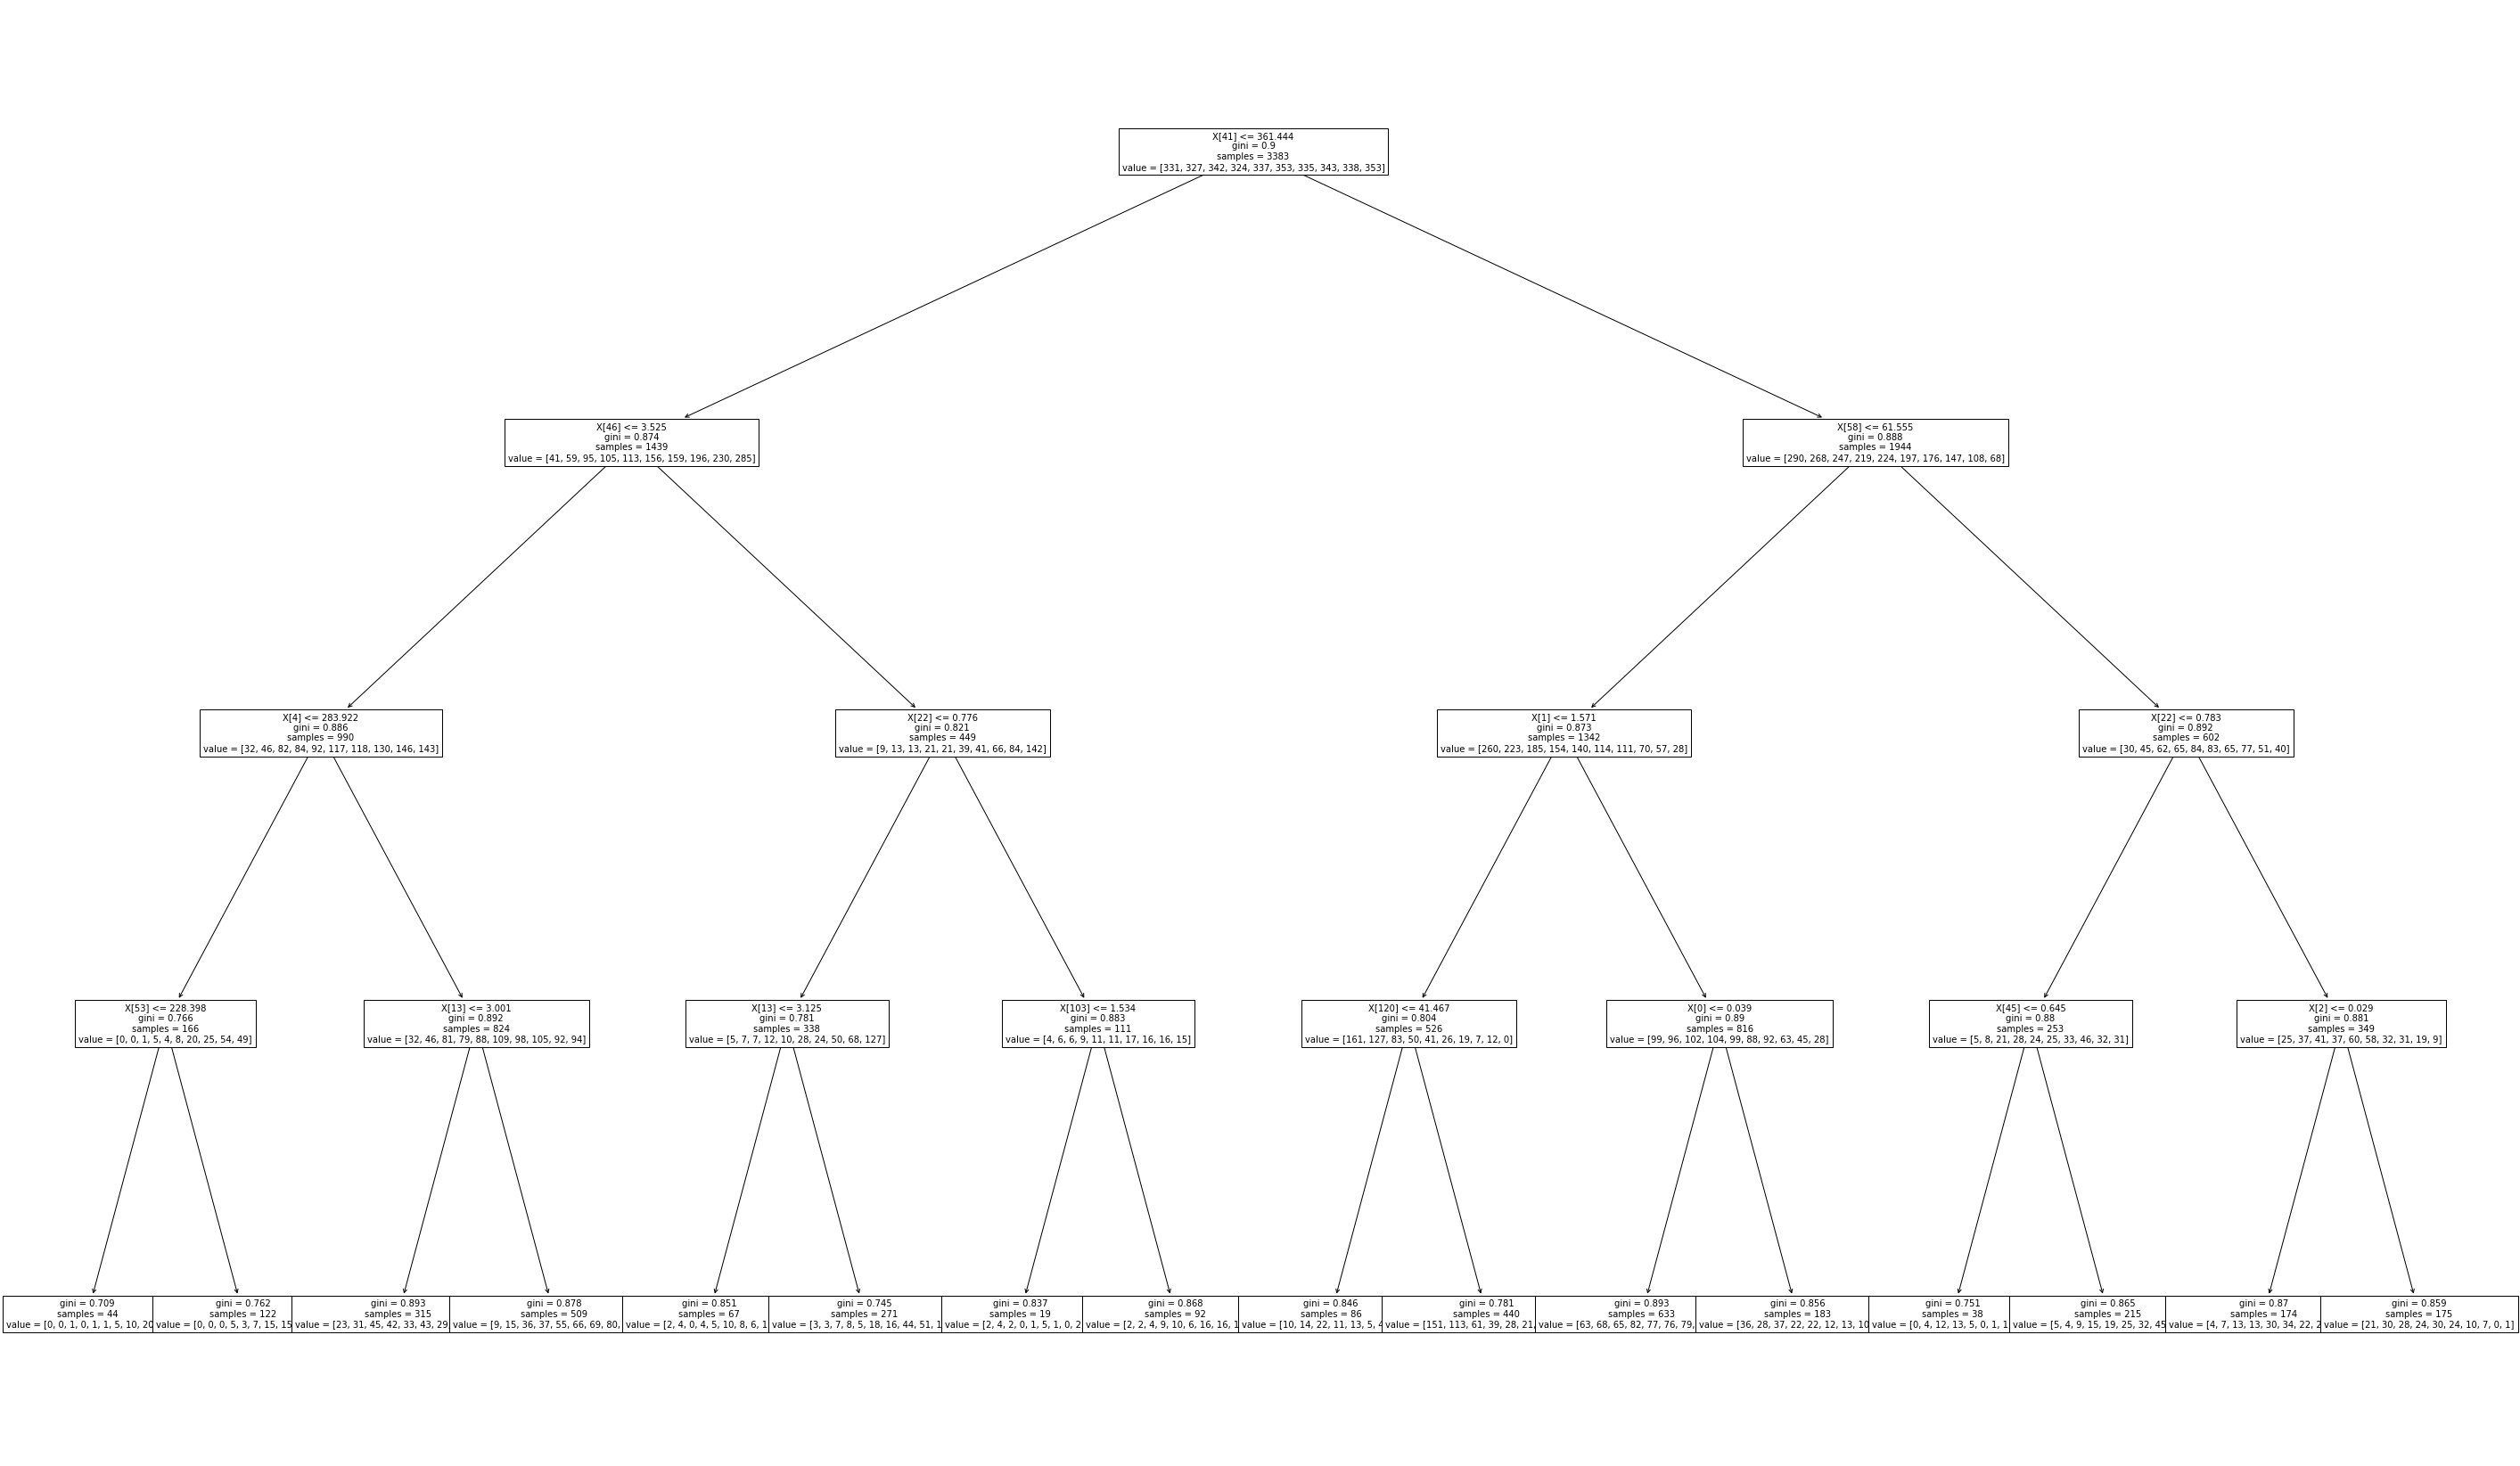

In [24]:
fig, ax = plt.subplots(figsize=(50, 30))
plot_tree(best_grid, fontsize=10)
plt.show()

Below we plot the confusion matrix of our optimised decision tree classifier. The values shown in the diagonal of the matrix show us the amount of correctly classified classes. All values outside of the diagonal are misclassified. The confusion matrix shows us that the model was most effective at predicting levels of deprivation in the top 10% and 20% of deprivation and the bottom 10% of deprivation. As the levels of deprivation become more normalised, where the deprivation level does not tend towards either high or low deprivation, the model's prediction accuracy falls. The reason for this in terms of peoples shopping habits may be that areas where the deprivation is normalised, are inhabited by a highly spread class of people whose shopping habits differ from each other. Whereas high and low deprivation areas are more likely to be inhabited by one class of people (upper and working-class respectively). As such, predicting the deprivation levels of an area inhabited by multiple classes of people, each with different shopping habits, using grocery shopping data is not ideal. It can also be said that decision tree classifiers are an overall mediocre classifier. Their advantages are that they can be used for both regression and classification, and they are easier to interpret than other methods; however, they do produce lower predictive performance than many other methods.

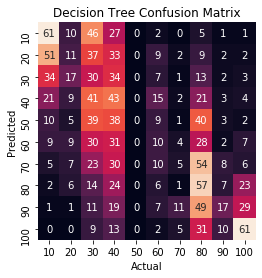

In [25]:
confusion = metrics.confusion_matrix(y_test, y_pred)
names =[ "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

QUESTION 2 - TRAIN A RANDOM FOREST CLASSIFIER. The aim of this question is to use a random forest classifier to predict the deprevation percentiles in IMD label using the rest of the data as predictors.

Firstly we create a default model and test its accuracy and precision. The features and subsequent training and testing data we use are the same for the decision tree classifiers. They should still be the optimal features for the decision trees used in a random forest classifier. The default model gives an accuracy of 26.2% and a precision of 24.8%.

In [26]:
forest = RandomForestClassifier(random_state = 1)
forest = forest.fit(x_train2,y_train2)
y_pred = forest.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test2, y_pred, average='macro') * 100)

Accuracy: 26.20689655172414
Precision: 24.83706773832225


Firstly, we will explore how the number of decision trees in our forest affects the accuracy of our model.

Similar to our decision tree classifier, we create a function to determine the performance of the random forest classifier by creating an instance of it with specific parameters and measuring its accuracy and precision.

In [27]:
def forest_performance(x_train, x_test, y_train, y_test, 
                       n_estimators = 100, 
                       criterion = "gini", 
                       bootstrap = True, 
                       max_depth = None):
    forest = RandomForestClassifier(n_estimators = n_estimators, 
                                    criterion = criterion,  
                                    max_depth = max_depth, 
                                    random_state = 0)
    forest = forest.fit(x_train,y_train)
    y_pred = forest.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) *100
    precision = metrics.precision_score(y_test, y_pred, average='macro',zero_division=0) *100
    return accuracy, precision

The function tree_perforance takes a list of integers representing how many trees are present in our random forest classifier. For each number of trees, an instance of the random forest classifier is created using that value. The accuracy and precision are calculated to see how the number of trees affects model performance.

In [28]:
def trees_performance(number_of_trees):
    trees_accuracies = []
    trees_precisions = []
    for i in number_of_trees:
        accuracy, precision = forest_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, 
                                                  n_estimators = i)
        trees_accuracies.append(accuracy)
        trees_precisions.append(precision)
    return trees_accuracies, trees_precisions

We test the performance of the random forest using various numbers of trees shown in number_of_trees. As we can see from the table, the maximum accuracy achieved from these values was 26.8% accuracy when using 160 trees. Going beyond 160 trees, it appears the accuracy starts to decrease, implying the model begins to overfit at some point after 160 trees. By using 160 trees, we can increase the accuracy of our model by 0.6% and our precision by 0.5%. A more optimised number of trees may exist for this classifier between 160 and 240 trees; however, we will explore this later using cross-validation.

In [29]:
number_of_trees = [2,5,10, 20, 40, 80, 120, 160, 240]
trees_accuracies, trees_precisions = trees_performance(number_of_trees)
trees_performances = pd.DataFrame(list(zip(number_of_trees, trees_accuracies, trees_precisions)), 
                                  columns =['Number of Trees', 
                                            'Average Predictive Accuracy in %', 
                                            'Average Predictive Precision in %'])
trees_performances

,Number of Trees,Average Predictive Accuracy in %,Average Predictive Precision in %
0,2,17.310345,19.480065
1,5,19.310345,19.186220
2,10,21.517241,21.312155
3,20,25.034483,24.454720
4,40,25.655172,24.721542
5,80,25.172414,23.945569
6,120,26.620690,25.396050
7,160,26.827586,25.280195
8,240,26.758621,25.485985


From the graph, we can conclude that unsurprisingly, as we increase the number of trees in the forest, the predictive accuracy of the classifier quickly increases. Random forest will choose the classification chosen by the majority of trees within the forest—as such, increasing the number of trees increases the chances of trees reaching a unanimous correct prediction. Beyond 10 trees used in the forest, the predictive accuracy starts to level; however, it does increase slightly as the number of trees increases.

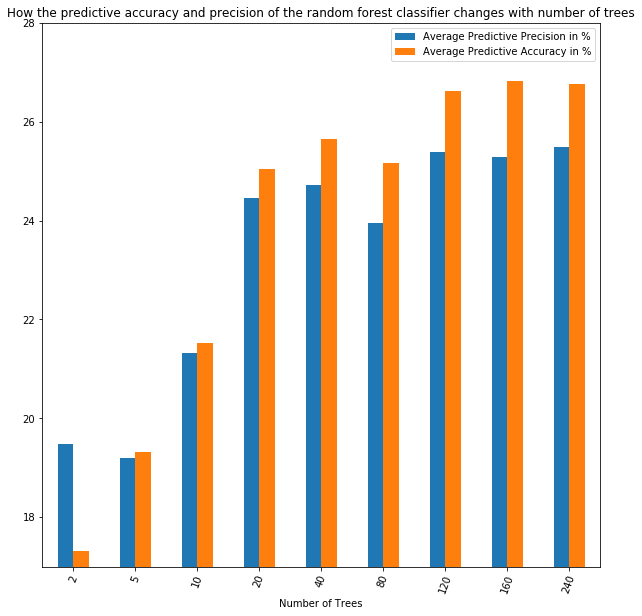

In [30]:
trees_performances.plot.bar(x="Number of Trees", 
                            y={"Average Predictive Accuracy in %", 
                               "Average Predictive Precision in %"}, 
                            rot=70, 
                            title="How the predictive accuracy and precision of the random forest classifier changes with number of trees", 
                            ylim = (17,28))

The function tree_depth_perforance takes a list of integers representing the depth of trees present in our random forest classifier. For each depth of the tree, an instance of the random forest classifier is created using that value, and the accuracy and precision are calculated to see how the number of trees affects model performance. The n_estimators (number of trees) parameter has been set to 160 as that gave us the optimum accuracy from the last question.

In [31]:
def trees_depth_performance(trees_depths):
    trees_depth_accuracies = []
    trees_depth_precisions = []
    for depth in trees_depths:
        accuracy, precision = forest_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, 
                                                  n_estimators = 160, max_depth = depth)
        trees_depth_accuracies.append(accuracy)
        trees_depth_precisions.append(precision)
    return trees_depth_accuracies, trees_depth_precisions

We test the performance of the random forest using a various number of tree depths shown in tree_depths. As we can see from the table, the maximum accuracy achieved from these values was 26.8% accuracy when the depth of trees was set to None, 50, 100 and 150. Firstly we can point out that the accuracy and precision have not increased from the last investigation due to None being the default option for the depth of trees. From these results, we can say that for this particular model and data set, the model performance does not seem to change after a depth of 50, suggesting its maximum depth is between 20 and 50. By using None, trees are expanded until they reach their final leaf nodes and, as such, would share the same performance as depths where the maximum depth has been reached. Depths of 1 and 2 have noticeably lower precision than you would estimate; this could be caused by a zero division error, a decrease in true positives or an increase in false positives.

In [32]:
trees_depths = [None, 1, 2, 5, 10, 20, 50, 100, 150]
trees_depth_accuracies, trees_depth_precisions = trees_depth_performance(trees_depths)
trees_depth_performances = pd.DataFrame(list(zip(trees_depths, trees_depth_accuracies, trees_depth_precisions)), 
                                        columns =['Depth of Trees', 
                                                  'Average Predictive Accuracy in %', 
                                                  'Average Predictive Precision in %'])
trees_depth_performances

,Depth of Trees,Average Predictive Accuracy in %,Average Predictive Precision in %
0,NaN,26.827586,25.280195
1,1.0,18.689655,6.936719
2,2.0,19.862069,14.052605
3,5.0,24.896552,23.736781
4,10.0,26.206897,24.121232
5,20.0,25.379310,23.930723
6,50.0,26.827586,25.280195
7,100.0,26.827586,25.280195
8,150.0,26.827586,25.280195


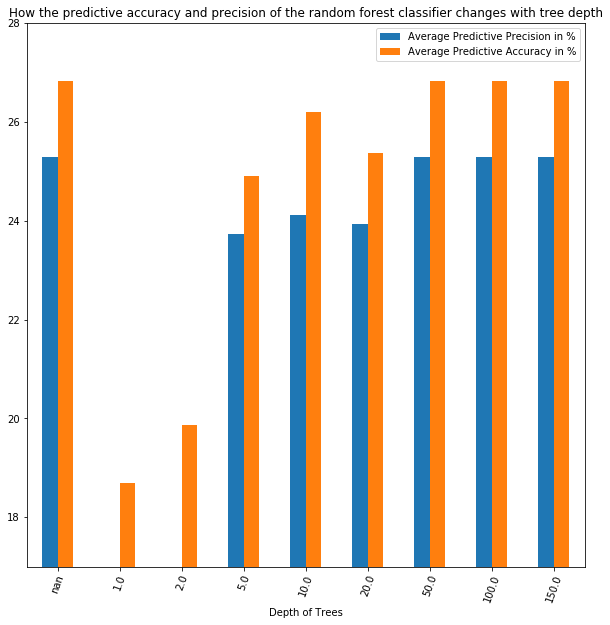

In [33]:
trees_depth_performances.plot.bar(x="Depth of Trees", 
                                  y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                                  rot=70, 
                                  title="How the predictive accuracy and precision of the random forest classifier changes with tree depth", 
                                  ylim = (17,28))

Next, we see how the presence of bootstrapping affects the accuracy of the model. Bootstrapping is a technique that uses random subsets of the training data when training the decision trees. In the code below, we create two instances of a random forest where bootstrap is set to True and False. From the results in the table, the bootstrap method does not affect the accuracy or precision. This could be mainly due to the fact that decision trees still use an element of the randomness of features when splitting nodes and assigning training data to decision trees. As such, the addition of random training data does not affect the performance of the model.

In [34]:
accuracy_boot, precision_boot = forest_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, 
                                                   bootstrap = True, 
                                                   n_estimators = 160, 
                                                   max_depth = None)
accuracy_no_boot, precision_no_boot = forest_performance(x_train = x_train2, x_test = x_test2, y_train = y_train2, y_test = y_test2, 
                                                         bootstrap = False, 
                                                         n_estimators = 160, 
                                                         max_depth = None)
boot_performance = pd.DataFrame({'Bootstrap' : ['Yes', 'No'], 
                                 'Average Predictive Accuracy in %': [accuracy_boot, accuracy_no_boot], 
                                 'Average Predictive Precision in %': [precision_boot, precision_no_boot]})
boot_performance

,Bootstrap,Average Predictive Accuracy in %,Average Predictive Precision in %
0,Yes,26.827586,25.280195
1,No,26.827586,25.280195


Similar to our decision tree classifier we once again apply cross validation through a grid search enforced by a random search. The parameter distributions differ slightly from our previous validation as we now include the number of tress created and whether or not to bootstrap. 

In [35]:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
param_distributions = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
}
cv_random = HalvingRandomSearchCV(forest, param_distributions, cv = 3, verbose=2, random_state=1, n_jobs = -1)
cv_random.fit(x_train2, y_train2)
cv_random.best_params_

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 60
max_resources_: 3383
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 56
n_resources: 60
Fitting 3 folds for each of 56 candidates, totalling 168 fits
----------
iter: 1
n_candidates: 19
n_resources: 180
Fitting 3 folds for each of 19 candidates, totalling 57 fits
----------
iter: 2
n_candidates: 7
n_resources: 540
Fitting 3 folds for each of 7 candidates, totalling 21 fits
----------
iter: 3
n_candidates: 3
n_resources: 1620
Fitting 3 folds for each of 3 candidates, totalling 9 fits


{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

By incorporating the optimal parameters shown above, we create a new random forest and calculate its performance. These parameters give us an accuracy of 27.1% and a precision of 25.9%. When compared to our previous model, we have increased its accuracy by 0.3% and its precision by 0.6%. The parameters chosen by the cross-validation can differ from the optimal parameters previously chosen by our analysis. The reason for this could be that cross-validation is checking far more values than us, and it uses different metrics for estimating the value of features.

In [36]:
best_random = RandomForestClassifier(n_estimators = 1000, 
                                     min_samples_split = 10, 
                                     min_samples_leaf = 2, 
                                     max_features = "auto", 
                                     max_depth = 40, 
                                     bootstrap = False, 
                                     random_state = 1)
best_random = best_random.fit(x_train2,y_train2)
y_pred_best = best_random.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_best) * 100)
print("Precision:",metrics.precision_score(y_test2, y_pred_best, average='macro', zero_division=0) * 100)

Accuracy: 27.103448275862068
Precision: 25.928533378476747


In [37]:
param_distributions = {'n_estimators': [1100, 1200, 1300, 2000],
    'max_depth': [60, 80, 100, 120],
    'min_samples_split': [12, 14, 16],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['auto'],
    'bootstrap': [False],
}
cv_grid = HalvingGridSearchCV(forest, param_distributions, n_jobs=-1, cv=3, verbose=2, random_state=1)
cv_grid.fit(x_train2, y_train2)
cv_grid.best_params_

n_iterations: 4
n_required_iterations: 5
n_possible_iterations: 4
min_resources_: 60
max_resources_: 3383
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 60
Fitting 3 folds for each of 144 candidates, totalling 432 fits
----------
iter: 1
n_candidates: 48
n_resources: 180
Fitting 3 folds for each of 48 candidates, totalling 144 fits
----------
iter: 2
n_candidates: 16
n_resources: 540
Fitting 3 folds for each of 16 candidates, totalling 48 fits
----------
iter: 3
n_candidates: 6
n_resources: 1620
Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 2000}

Surprisingly the implementation of parameter values acquired from grid search has decreased the accuracy of our model by 0.8% and our precision by 1.1%. This implies that the updated parameter intervals used for our grid search did not contain values that improved upon our model compared to those in the random search. As such, we choose to use the model from the random search as our final random forest 

In [38]:
best_grid = RandomForestClassifier(n_estimators = 2000, 
                                   min_samples_split = 12, 
                                   min_samples_leaf = 3, 
                                   max_features = "auto", 
                                   max_depth = 100, 
                                   bootstrap = False, 
                                   random_state = 1)
best_grid = best_grid.fit(x_train2,y_train2)
y_pred = best_grid.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test2, y_pred, average='macro', zero_division=0) * 100)

Accuracy: 26.275862068965516
Precision: 24.821393128286367


The plot below shows a visualization of the first tree present in our random forest classifier. Due to our random forest having 1000 trees, it would be impossible to plot the entire forest, and as such, I have plotted the first tree as an example of the structure of all trees in the forest. The trees have a max depth of 40, meaning that nodes split 40 times before reaching their leaf nodes created a very tall decision tree. By zooming in, we can see the Gini impurity values of nodes, which, similar to our decision tree classifier, are very high (> 0.9) at the root node; however, as you progress down the tree, the Gini impurities start to decrease showing an increase in classification purity as more nodes are split.

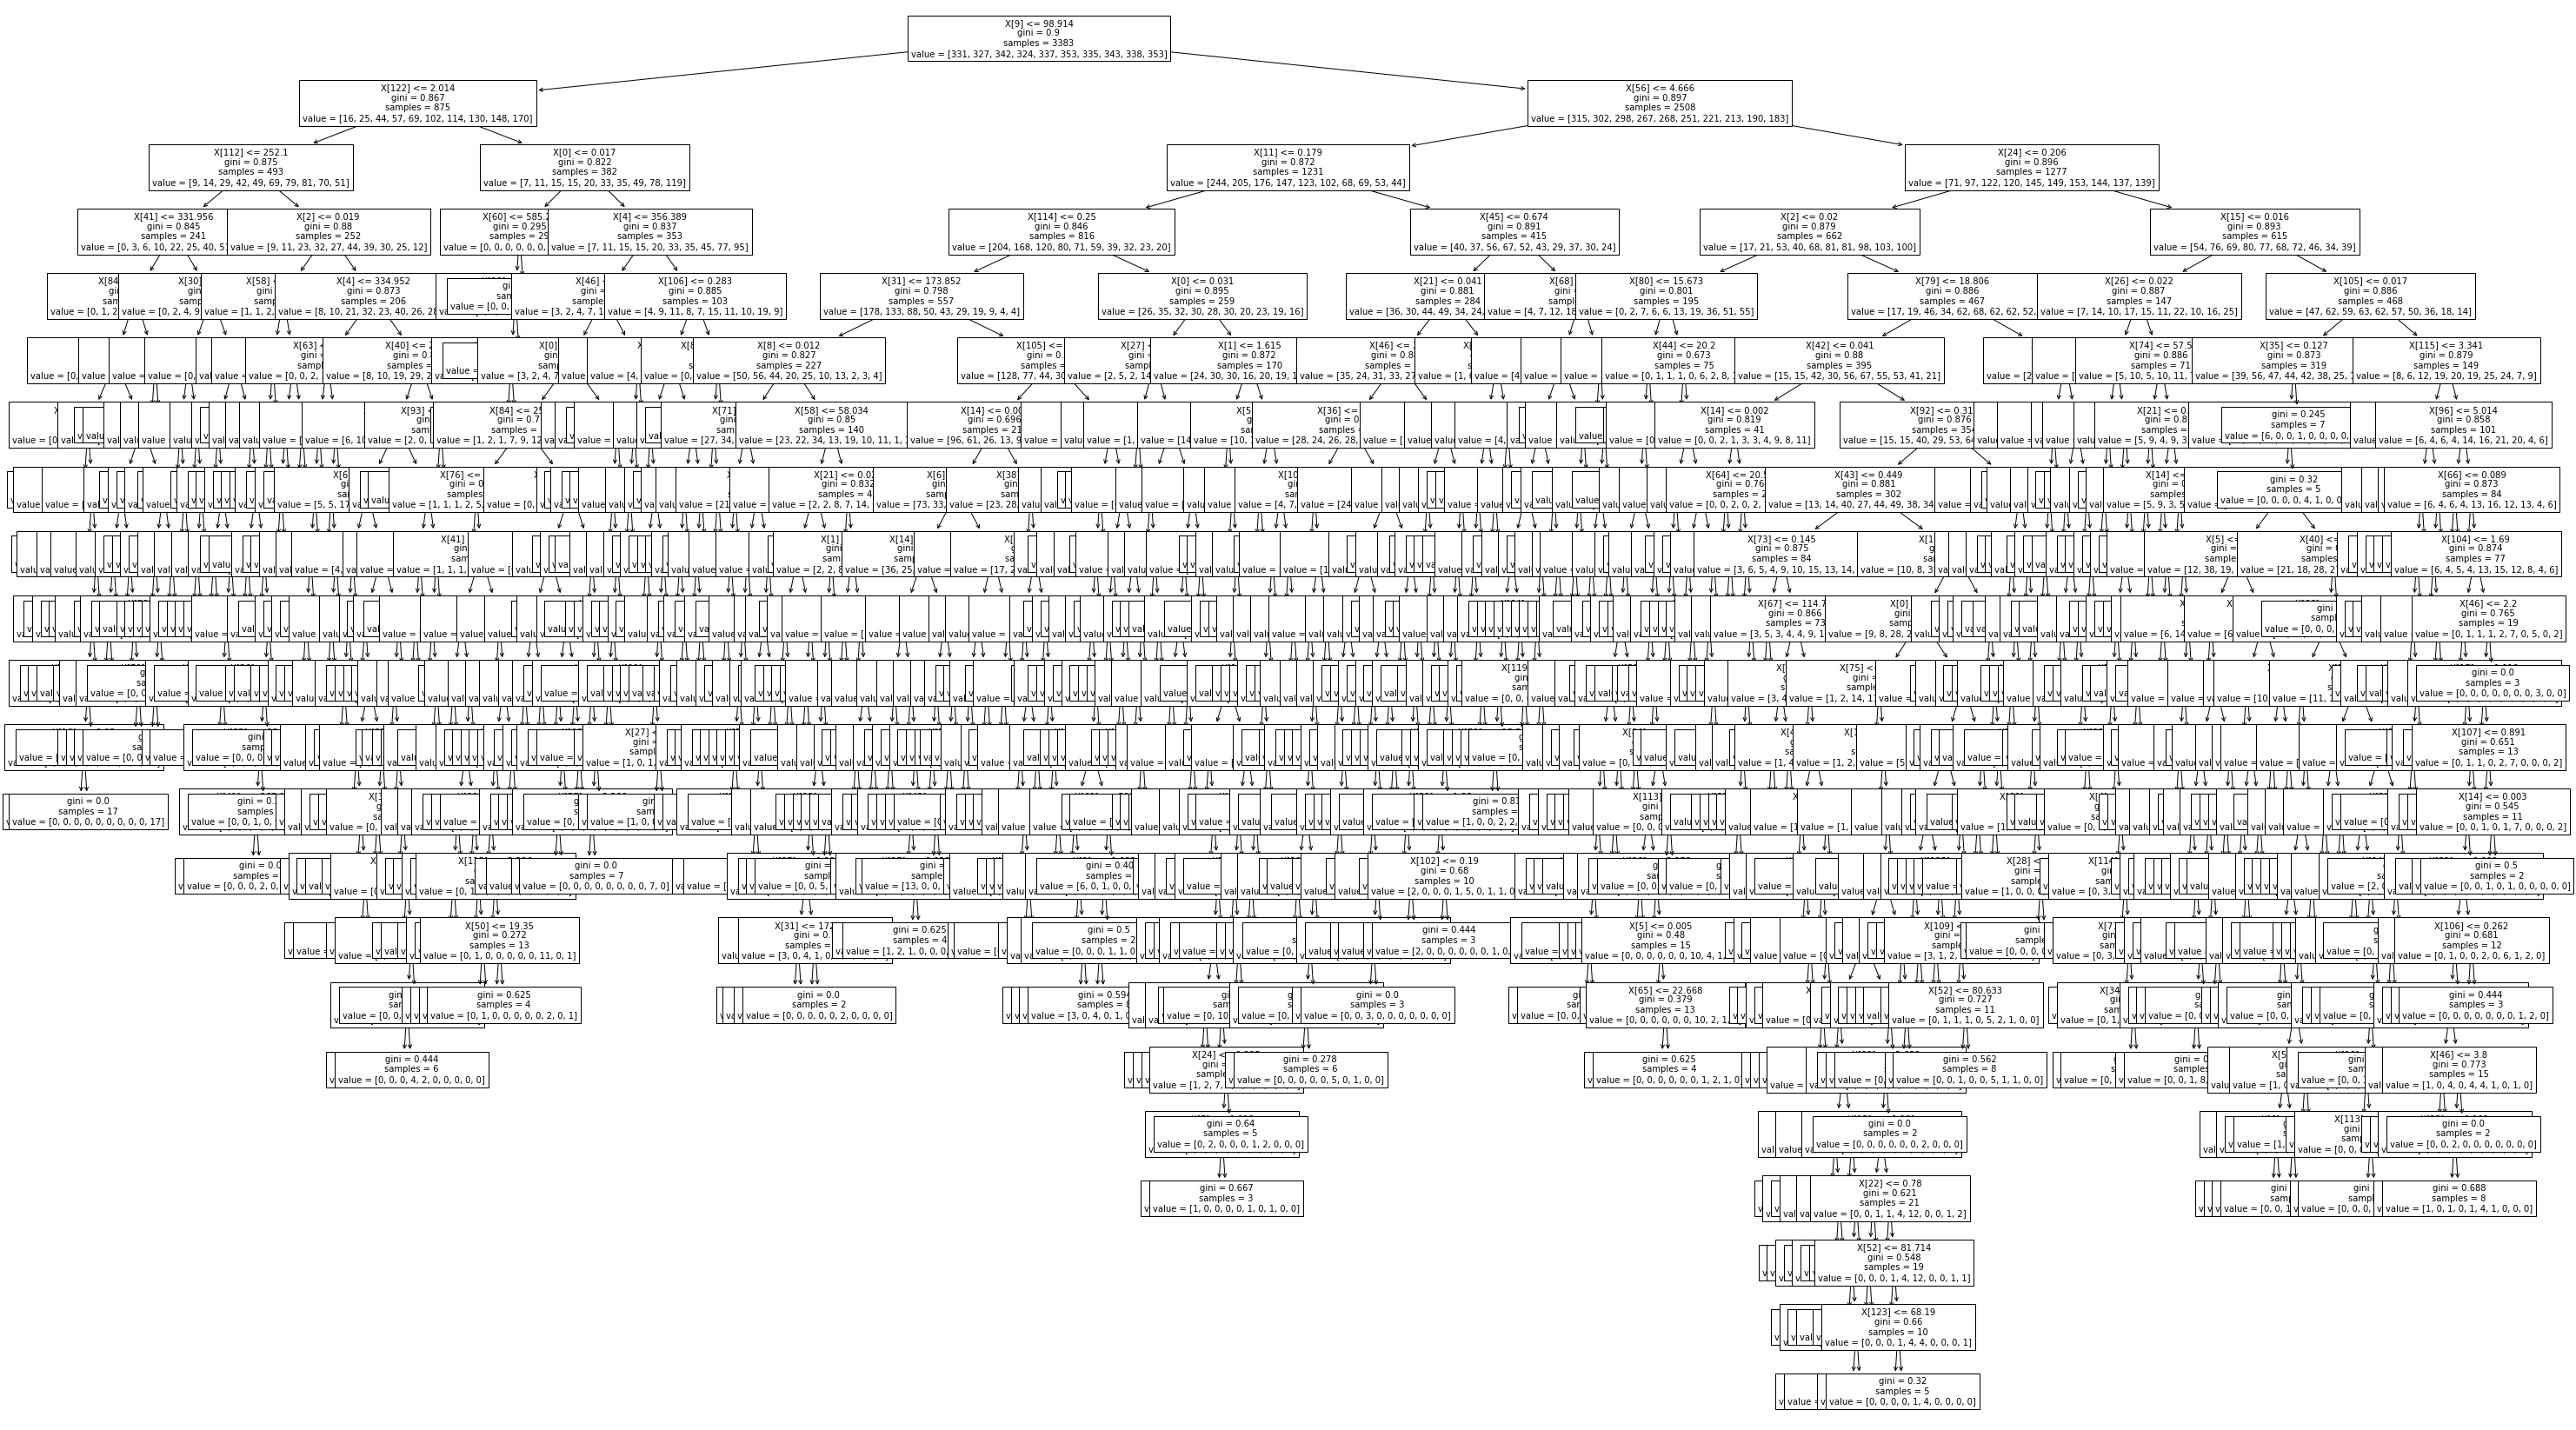

In [39]:
fig, ax = plt.subplots(figsize=(50, 30))
plot_tree(best_random.estimators_[0], fontsize=10)
plt.show()

Below we plot the confusion matrix for our optimised random forest classifier. As previously stated, the confusion matrix displays the correct and incorrect classifications predicted by our model. Correct classifications are displayed on the vertical line from the top left to the bottom right, where the x-axis (predicted values) equate to the y axis (actual values). Immediately from this confusion matrix, we can see the improvement in predictive consistency and accuracy from our decision tree classifier. The number of correct predictions on our vertical line is all roughly equal, indicating the model was able to classify most classes with equal accuracy with the exception of the lower and upper bounds (10 and 100). This may be due to our previous theory of the data correlating most with extreme cases. This confusion matrix does alter our observations made from the decision tree classifier stating that the data did not correlate well to normalised levels of deprivation (class of 50, for example) as this model was able to classify these normalised levels of deprivation. The accuracy around these normalised classes is still lower than the lower and upper bounds, so perhaps this observation does still carry some weight. This may, however, imply that the decision tree classifier was instead to blame for the lack of accuracy in these middle levels of deprivation. Viewing this confusion matrix, we can also discuss the overall accuracy of the classifier in the sense of not making an accurate prediction but how close the model came to making a correct prediction. As we move further away from the correct vertical line, the misclassification rate decreases, implying that the model rarely made predictions more than 3 or 4 classes (above or below) away from its actual class. Considering all of this, we can confidently say that the random forest classifier is an overall superior model when compared with the decision tree classifier.

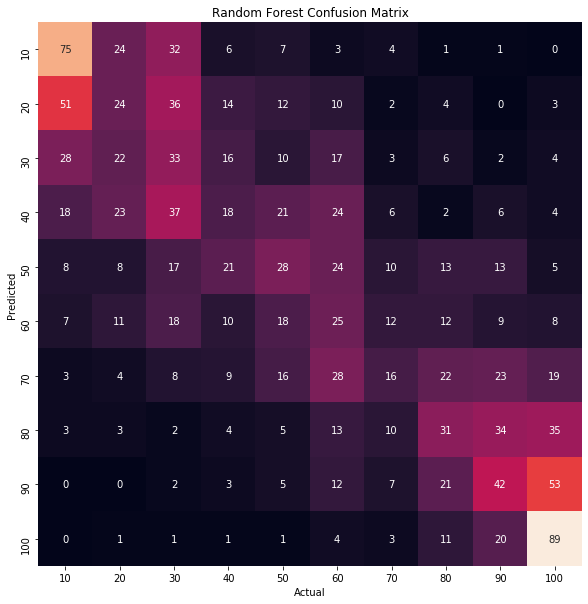

In [40]:
confusion = metrics.confusion_matrix(y_test, y_pred)
names =[ "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

QUESTION 3 - TRAIN A MULTI-LAYER  PERCEPTRON CLASSIFIER. The aim of this question is to use a perceptron classifier to predict the deprevation percentiles in IMD label using the rest of the data as predictors.

Firstly we create a default perceptron model and calculate its accuracy and precision metrics. The default model has an accuracy of 17.9% and a precision of 20.5%. The default perceptron model has the lowest accuracy compared to all over previously analysed methods. 

In [41]:
perceptron = MLPClassifier(max_iter=100, random_state = 3)
perceptron = perceptron.fit(x_train,y_train)
y_pred = perceptron.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)

Accuracy: 17.586206896551722
Precision: 20.48081116875625


The perceptron_peformance function takes as parameters our training and testing data and MLP Classifier parameters, creates an instance of the MLP Classifer using these parameters and assesses its peformance based on accuracy and precision. Some of the MLP CLassifiers are given default arguments equal to that of the standard function defaults. 

In [42]:
def perceptron_performance(x_train, x_test, y_train, y_test, 
                           hidden_layer_sizes = 100, 
                           activation = "relu", 
                           solver = "adam", 
                           learning_rate = "constant"):
    perceptron = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, 
                               activation = activation, solver = solver, 
                               learning_rate = learning_rate, 
                               max_iter = 1000, 
                               random_state = 3)
    perceptron = perceptron.fit(x_train,y_train)
    y_pred = perceptron.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred) *100
    precision = metrics.precision_score(y_test, y_pred, average='macro',zero_division=0) *100
    return accuracy, precision

Firstly we will inspect how the dimensions of the perceptron (number of layers, numbers of neurons per layer) effects the models performance. The function layers_peformance take a list of tuples (tuples contain integers), which represent the structure of the perceptron. The number of elements in the tuple represents the number of layers in the perception, and the integer value of each element represents that layers number of neurons. The function uses these tuples to create a perceptron of that structure and assess its performance. In order to analyse how these two components (layers and neurons) affects the predictive performance, multiple tests have been taken, each of which test a different change in structure. Single-layer perceptrons are only are to represent linear functions, and as such, a classification problem using multiple independent variables would not seem suitable for a single-layered MLP. As the number of layers increases, we are able to represent increasingly complex functions, so we could estimate that by using an MLP with multiple layers, we would achieve higher accuracy when applied to a classification problem with many independent variables. There are, however, arguments that MLPs with 1 or 2 layers are able to approximate any imaginable functions. In the end, the best way to ascertain the optimal structure is through experimentation.

In [43]:
def layers_performance(number_of_layers):
    layers_accuracies = []
    layers_precisions = []
    for i in number_of_layers:
        accuracy, precision = perceptron_performance(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, 
                                                  hidden_layer_sizes = i)
        layers_accuracies.append(accuracy)
        layers_precisions.append(precision)
    return layers_accuracies, layers_precisions

Below we explore the performance of our MLP Classifier by incrementing the number of layers while keeping the number of neurons in each layer the same. This means as the number of layers increases, the total number of neurons present in the perceptron increases, so we would expect predictive performance to increase as the number of layers increases. The results below give an expected outcome with slight deviations. As could be predicted, the accuracy and precision of our model is very low when using only 1 layer as our model is not linear. The predictive accuracy and precision increases continually up to the 5 layer model except for the inclusion of the 4 layer model, which has a dip in accuracy and precision. This could be due to the random nature of perceptrons where the forward and backward propagations were simply not in their favour. Precision seems to drop for the 4 and 5 layer models indicating a decrease in true positives or an increase in false positives. The bar plot displayed below best represents this.

In [44]:
number_of_layers = [(20), (20,20), (20,20,20), (20,20,20,20), (20,20,20,20,20)]
layers_accuracies, layers_precisions = layers_performance(number_of_layers)
layers_performances = pd.DataFrame(list(zip(number_of_layers, layers_accuracies, layers_precisions)), 
                                   columns =['(Number of Hidden Units, Number of Hidden Layers)', 
                                             'Average Predictive Accuracy in %', 
                                             'Average Predictive Precision in %'])
layers_performances

,"(Number of Hidden Units, Number of Hidden Layers)",Average Predictive Accuracy in %,Average Predictive Precision in %
0,20,14.206897,14.084497
1,"(20, 20)",18.758621,15.358033
2,"(20, 20, 20)",21.793103,20.390467
3,"(20, 20, 20, 20)",19.241379,16.303990
4,"(20, 20, 20, 20, 20)",22.206897,18.977610


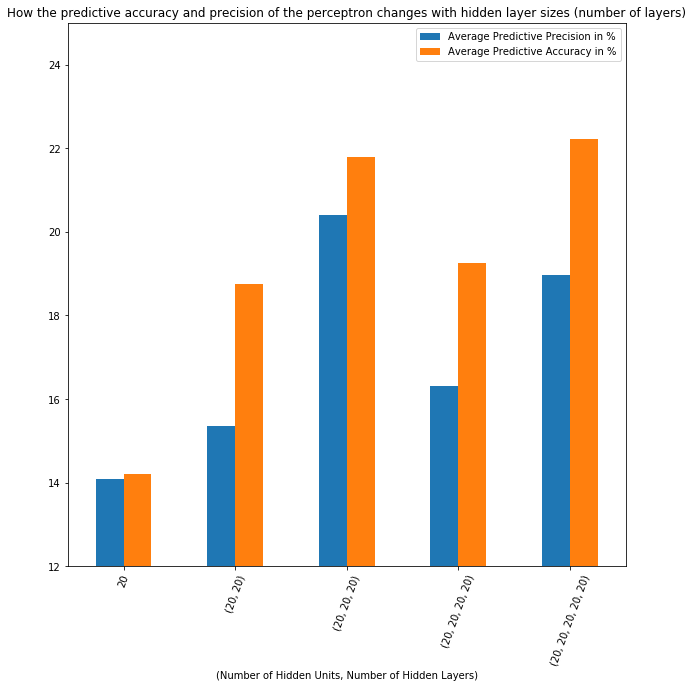

In [45]:
layers_performances.plot.bar(x="(Number of Hidden Units, Number of Hidden Layers)", 
                             y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                             rot=70, 
                             title="How the predictive accuracy and precision of the perceptron changes with hidden layer sizes (number of layers)", 
                             ylim = (12,25))

Below we investigate how the number of neruons in each layer effects the performance of the model while keeping the number of layers the same (2). The results of this investigation appear inconclusive with predicitve accuracy not seemingly corellating with the number of neurons in the network. The highest accuracy achieved was 18.1% and precision of 21.4%. While the precision gives a high result the accuracy is lower than the vast majority of previously tested structures. Perhaps further investigation would prove benficial by increasing the number of layers to 3 or 4.  

In [46]:
number_of_layers = [(20,20), (30,30), (40,40), (50,50), (60,60)]
layers_accuracies, layers_precisions = layers_performance(number_of_layers)
layers_performances = pd.DataFrame(list(zip(number_of_layers, layers_accuracies, layers_precisions)), 
                                   columns =['(Number of Hidden Units, Number of Hidden Layers)', 
                                             'Average Predictive Accuracy in %', 
                                             'Average Predictive Precision in %'])
layers_performances

,"(Number of Hidden Units, Number of Hidden Layers)",Average Predictive Accuracy in %,Average Predictive Precision in %
0,"(20, 20)",18.758621,15.358033
1,"(30, 30)",18.000000,17.716789
2,"(40, 40)",16.689655,15.985766
3,"(50, 50)",18.137931,21.437604
4,"(60, 60)",12.896552,19.167733


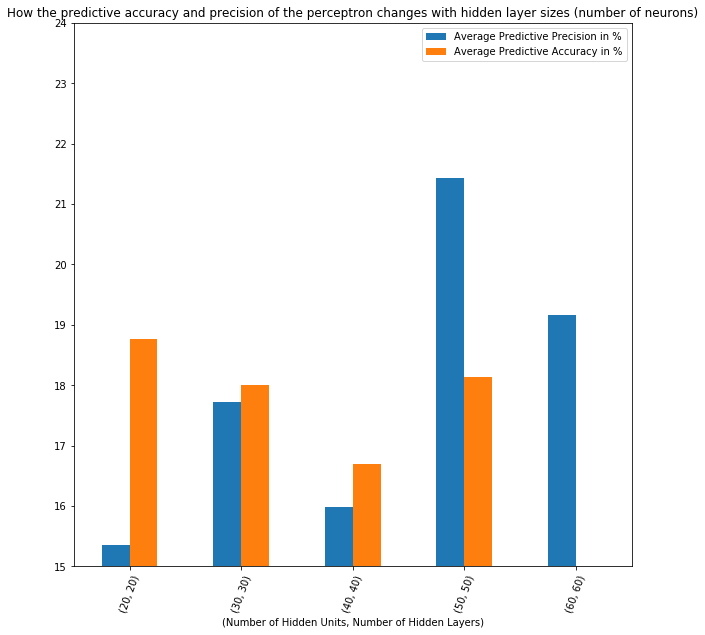

In [47]:
layers_performances.plot.bar(x="(Number of Hidden Units, Number of Hidden Layers)", 
                             y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                             rot=70, 
                             title="How the predictive accuracy and precision of the perceptron changes with hidden layer sizes (number of neurons)", 
                             ylim = (15,24))

Finally we investigate the performance of the MLP where the total number of neurons are the same but the number of layers the neurons are spread over increases. The total number of neurons for each model is 60 while the number of layers includes 1,2,3 and 6. The predictive accuracy smoothly increases from 1 layer up to 3 with 3 layers producing the highest performance with an accuracy of 21.8% and precision of 20.4%. However from 3 layers to 6 the accuracy drops by 1.5% and the precision by 18.5. It would appear the optimum number of layers may lie between 3 and 6 layers. Let us investigate the performances of models with 4 and 5 layers. 

In [48]:
number_of_layers = [(60), (30,30), (20,20,20), (10,10,10,10,10,10)]
layers_accuracies, layers_precisions = layers_performance(number_of_layers)
layers_performances = pd.DataFrame(list(zip(number_of_layers, layers_accuracies, layers_precisions)), 
                                   columns =['(Number of Hidden Units, Number of Hidden Layers)', 
                                             'Average Predictive Accuracy in %', 
                                             'Average Predictive Precision in %'])
layers_performances

,"(Number of Hidden Units, Number of Hidden Layers)",Average Predictive Accuracy in %,Average Predictive Precision in %
0,60,17.379310,16.737533
1,"(30, 30)",18.000000,17.716789
2,"(20, 20, 20)",21.793103,20.390467
3,"(10, 10, 10, 10, 10, 10)",20.344828,18.469248


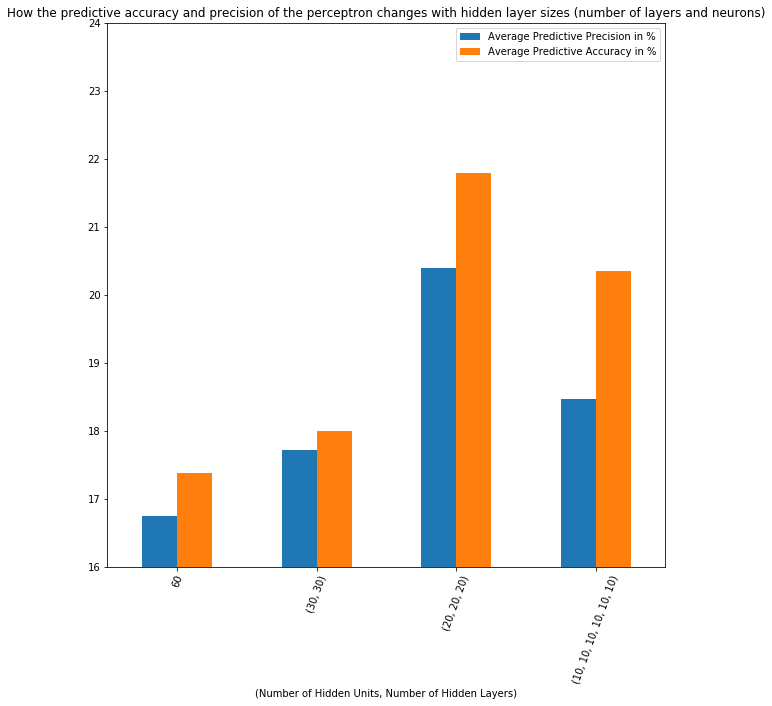

In [49]:
layers_performances.plot.bar(x="(Number of Hidden Units, Number of Hidden Layers)", 
                             y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                             rot=70, 
                             title="How the predictive accuracy and precision of the perceptron changes with hidden layer sizes (number of layers and neurons)", 
                             ylim = (16,24))

Through further analysis we can confidently say that for this particular test the MLP utilising 3 layers gave the best performance but not the best overal performance. The best overal performance was with a MLP structure of (20, 20, 20, 20, 20) which has 5 layers each of which with 20 neurons each producing an accuracy of 22.2% and a precision of 19.0%. 

In [50]:
number_of_layers = [(15, 15, 15, 15), (12, 12, 12, 12, 12)]
layers_accuracies, layers_precisions = layers_performance(number_of_layers)
layers_performances = pd.DataFrame(list(zip(number_of_layers, layers_accuracies, layers_precisions)), 
                                   columns =['(Number of Hidden Units, Number of Hidden Layers)', 
                                             'Average Predictive Accuracy in %', 
                                             'Average Predictive Precision in %'])
layers_performances

,"(Number of Hidden Units, Number of Hidden Layers)",Average Predictive Accuracy in %,Average Predictive Precision in %
0,"(15, 15, 15, 15)",21.172414,19.925071
1,"(12, 12, 12, 12, 12)",20.206897,19.092504


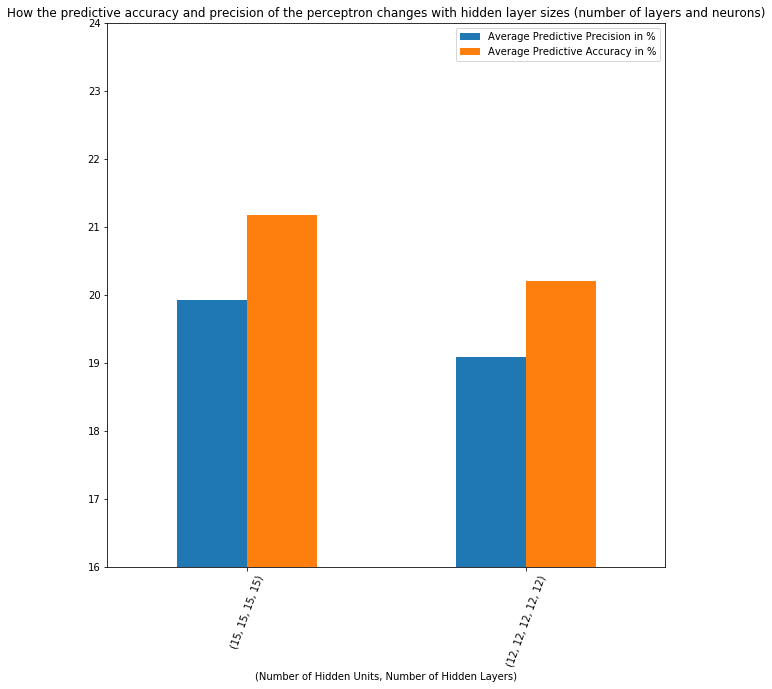

In [51]:
layers_performances.plot.bar(x="(Number of Hidden Units, Number of Hidden Layers)", 
                             y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                             rot=70, 
                             title="How the predictive accuracy and precision of the perceptron changes with hidden layer sizes (number of layers and neurons)", 
                             ylim = (16,24))

Next, we will explore how the activation function used by the MLP effects its performance as a classifier. The activation function of a perceptron is extremely important as it defines how the weighted sum of the input dictates the output. The output in this scenario is the predicted class. As such, the activation function has a big impact on predictive performance. Below we explore how each activation function affects the predictive accuracy and precision of our MLP. The function function-performance takes a list of strings, each element of which is an activation function and creates an instance of an MLP using that activation function, its performance is then calculated. For this test, we will be using the MLP structure that gave the highest accuracy from our previous test, which was (20,20,20,20,20).

In [52]:
def function_performance(functions):
    layers_accuracies = []
    layers_precisions = []
    for function in functions:
        accuracy, precision = perceptron_performance(x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, 
                                                  activation = function, hidden_layer_sizes = (20,20,20,20,20))
        layers_accuracies.append(accuracy)
        layers_precisions.append(precision)
    return layers_accuracies, layers_precisions

Below we list all of our activation functions which include identity, logistic, tanh and relu. From the table, we can see that the activation function used has a large impact on the performance. The activation function which produced the best accuracy and precision was ReLU at 22.2% and 19.0%, respectively. These results are the same from the previous tests, as ReLU is the default activation function for MLPClassifer. ReLU stands for the Rectified Linear Unit, which is a piecewise linear function that will output the input if it is positive and it will output 0 otherwise. It is no surprise that this function performed the best as it is the standard activation function for neural networks as it makes models easier to train and usually improves performance over others.

In [53]:
functions = ["identity", "logistic", "tanh", "relu"]
functions_accuracies, functions_precisions = function_performance(functions)
function_performances = pd.DataFrame(list(zip(functions, functions_accuracies, functions_precisions)), 
                                     columns =['Activation Function', 
                                               'Average Predictive Accuracy in %', 
                                               'Average Predictive Precision in %'])
function_performances

,Activation Function,Average Predictive Accuracy in %,Average Predictive Precision in %
0,identity,17.103448,14.110338
1,logistic,8.965517,0.896552
2,tanh,14.000000,7.930921
3,relu,22.206897,18.977610


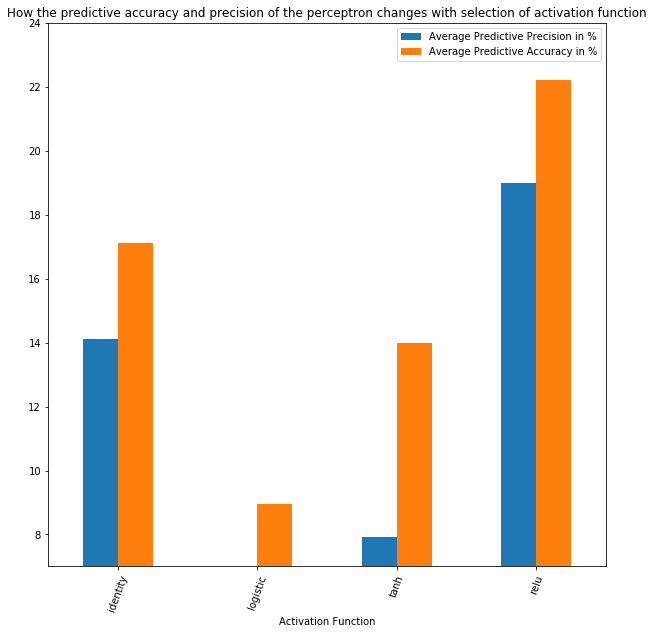

In [54]:
function_performances.plot.bar(x="Activation Function", 
                               y={"Average Predictive Accuracy in %", "Average Predictive Precision in %"}, 
                               rot=70, 
                               title="How the predictive accuracy and precision of the perceptron changes with selection of activation function", 
                               ylim = (7,24))

Initally I had intended to perform cross validation on my MLPClassifier however for reasons that I could not fathom it would take far too long to compute even using the halving random function. So instead i will be generating the confusion matrix using the best parameters found from systematic testing. 

Below is the performance of the perceptron using the above-discussed parameters. The final accuracy recording is 22.2% and a precision recording of 19.0%. Compared to the original model, this is an increase in accuracy of 4.6%, surprisingly a precision decrease of 1.5%. Once again, this may be due to a zero divide error, an increase in false positives or a decrease in true positives. As the accuracy metric is what we consider to be the best metric of performance for a classification problem, this new model can be argued to be superior.

In [55]:
best_perceptron = MLPClassifier(hidden_layer_sizes = (20,20,20,20,20), activation = "relu", random_state = 3)
best_perceptron = best_perceptron.fit(x_train,y_train)
y_pred = best_perceptron.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro', zero_division=0) * 100)

Accuracy: 22.206896551724135
Precision: 18.977610127067297


Finally, we display the confusion matrix for our final MLP Classifier. Comparing accuracies of all models investigated, we can rank them from highest accuracy to lowest as random forest, MLP and decision tree. Our random forest classifier scored 26.3%, our MLP classifier scored 22.2%, and our decision tree scored 20.3%. From this matrix, we can see that once again, the lower and upper bounds of our classes have the lowest misclassification rate. Surprisingly a vast number of misclassifications made by the MLP have been misclassified as 10. The reason for this is not inherently apparent. Further investigation into this issue could be conducted by changing the random state of the model and seeing if this issue re-occurs. Like the decision tree classifier, the MLP classifier struggles to correctly classify classes outside of the lowest and highest bound (10 and 100).

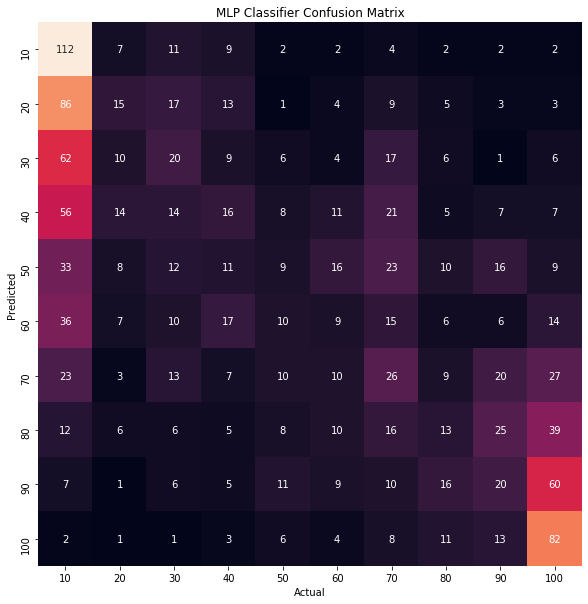

In [56]:
confusion = metrics.confusion_matrix(y_test, y_pred)
names =[ "10", "20", "30", "40", "50", "60", "70", "80", "90", "100"]
sns.heatmap(confusion, square=True, annot=True, fmt='g', cbar=False,
            xticklabels=names, yticklabels=names)
plt.rcParams["figure.figsize"]=(10,10)
plt.title('MLP Classifier Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

To briefly summarise this investigation, I can say confidently that for the given data set and task of classifying levels of deprivation using grocery store data, the best performing method was the random forest classifier which produced the best overall consistency and accuracy of predictions.